<a href="https://www.kaggle.com/code/yahyasoker/mushroom-prediction?scriptVersionId=249932181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
import os
import random
import shutil
from tqdm import tqdm
import pandas as pd

In [5]:
# Function to move files to respective directories with progress bar
def move_files(file_paths, labels, target_dirs):
    with tqdm(total=len(file_paths), desc="Moving Files", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}") as pbar:
        for file_path, label in zip(file_paths, labels):
            target_dir = target_dirs[label]
            shutil.copy(file_path, target_dir)
            pbar.update(1)

In [6]:
# =============================================================================
# Function to prepare data with a 70-10-20 (train-valid-test) split
# =============================================================================
def data_prep_split(input_dir, output_dir, classes):
    # Define output directories
    train_dir = os.path.join(output_dir, "train")
    valid_dir = os.path.join(output_dir, "valid")
    test_dir = os.path.join(output_dir, "test")

    # Create directories for each class in each split
    split_dirs = {
        'train': {},
        'valid': {},
        'test': {}
    }

    for split in split_dirs:
        for class_name in classes:
            path = os.path.join(output_dir, split, class_name)
            os.makedirs(path, exist_ok=True)
            split_dirs[split][class_name] = path

    # Process each class
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(input_dir, class_name)
        class_files = [os.path.join(class_dir, file) for file in os.listdir(class_dir)
                       if os.path.isfile(os.path.join(class_dir, file))]

        # Shuffle the files
        random.shuffle(class_files)

        # Compute split indices
        total = len(class_files)
        train_end = int(0.7 * total)
        valid_end = train_end + int(0.1 * total)

        train_files = class_files[:train_end]
        valid_files = class_files[train_end:valid_end]
        test_files = class_files[valid_end:]

        # Move files
        move_files(train_files, [label] * len(train_files), list(split_dirs['train'].values()))
        move_files(valid_files, [label] * len(valid_files), list(split_dirs['valid'].values()))
        move_files(test_files, [label] * len(test_files), list(split_dirs['test'].values()))

    print("Data successfully split into train, validation, and test directories.")

In [7]:
# Function to create a DataFrame for training/testing data
def create_df(data_path):
    classes, class_paths = zip(*[
        (label, os.path.join(data_path, label, file))
        for label in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, label))
        for file in os.listdir(os.path.join(data_path, label))
    ])
    df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return df


In [8]:
from pathlib import Path

dataset_path = Path('/kaggle/input/mushroom1/merged_dataset')
classes = [subdir.name for subdir in dataset_path.iterdir() if subdir.is_dir()]

# class_names array contains all directory names
print("Class names:", classes)

Class names: ['Stropharia aeruginosa', 'Urnula craterium', 'Psilocybe caerulescens', 'Hericium coralloides', 'Armillaria mellea', 'Artomyces pyxidatus', 'Coprinellus micaceus', 'Chlorophyllum molybdites', 'Lycogala epidendrum', 'Agaricus augustus', 'Amanita calyptroderma', 'Rhytisma acerinum', 'Cerioporus squamosus', 'Leratiomyces ceres', 'Gloeophyllum sepiarium', 'Amanita flavoconia', 'Trametes gibbosa', 'Fomes fomentarius', 'Gyromitra gigas', 'Cantharellus cibarius', 'Boletus reticulatus', 'Chlorophyllum brunneum', 'Phallus impudicus', 'Calocera viscosa', 'Flammulina velutipes', 'Lactarius deliciosus', 'Suillus spraguei', 'Amanita augusta', 'Physcia adscendens', 'Cladonia rangiferina', 'Leccinum albostipitatum', 'Xanthoria parietina', 'Lactarius turpis', 'Stropharia ambigua', 'Hypogymnia physodes', 'Ganoderma tsugae', 'Armillaria tabescens', 'Phyllotopsis nidulans', 'Phlebia tremellosa', 'Cryptoporus volvatus', 'Leucoagaricus leucothites', 'Psilocybe pelliculosa', 'Leccinum scabrum',

In [10]:
# Paths (update these based on your dataset structure)
input_dir = dataset_path
output_dir = "/kaggle/working/"      # Directory where you want to store the processed data
# Prepare data with an 80-20 split
data_prep_split(input_dir, output_dir,classes)

# Create DataFrames for train and test data
train_path = os.path.join(output_dir, "train")
test_path = os.path.join(output_dir, "test")
valid_path = os.path.join(output_dir, "valid")


train_df = create_df(train_path)
test_df = create_df(test_path)
valid_df = create_df(valid_path)

# Display DataFrames
print("Training DataFrame:")
print(train_df.head())

print("\nTesting DataFrame:")
print(test_df.head())

print("\nValid DataFrame:")
print(valid_df.head())


Moving Files: 100%|██████████| 235/235
Moving Files: 100%|██████████| 33/33
Moving Files: 100%|██████████| 68/68
Moving Files: 100%|██████████| 209/209
Moving Files: 100%|██████████| 29/29
Moving Files: 100%|██████████| 61/61
Moving Files: 100%|██████████| 147/147
Moving Files: 100%|██████████| 21/21
Moving Files: 100%|██████████| 43/43
Moving Files: 100%|██████████| 633/633
Moving Files: 100%|██████████| 90/90
Moving Files: 100%|██████████| 182/182
Moving Files: 100%|██████████| 227/227
Moving Files: 100%|██████████| 32/32
Moving Files: 100%|██████████| 66/66
Moving Files: 100%|██████████| 891/891
Moving Files: 100%|██████████| 127/127
Moving Files: 100%|██████████| 255/255
Moving Files: 100%|██████████| 510/510
Moving Files: 100%|██████████| 73/73
Moving Files: 100%|██████████| 147/147
Moving Files: 100%|██████████| 164/164
Moving Files: 100%|██████████| 23/23
Moving Files: 100%|██████████| 48/48
Moving Files: 100%|██████████| 175/175
Moving Files: 100%|██████████| 25/25
Moving Files

Data successfully split into train, validation, and test directories.
Training DataFrame:
                                          Class Path                  Class
0  /kaggle/working/train/Hypholoma fasciculare/12...  Hypholoma fasciculare
1  /kaggle/working/train/Hypholoma fasciculare/Hy...  Hypholoma fasciculare
2  /kaggle/working/train/Hypholoma fasciculare/Hy...  Hypholoma fasciculare
3  /kaggle/working/train/Hypholoma fasciculare/12...  Hypholoma fasciculare
4  /kaggle/working/train/Hypholoma fasciculare/12...  Hypholoma fasciculare

Testing DataFrame:
                                          Class Path                  Class
0  /kaggle/working/test/Hypholoma fasciculare/124...  Hypholoma fasciculare
1  /kaggle/working/test/Hypholoma fasciculare/124...  Hypholoma fasciculare
2  /kaggle/working/test/Hypholoma fasciculare/Hyp...  Hypholoma fasciculare
3  /kaggle/working/test/Hypholoma fasciculare/124...  Hypholoma fasciculare
4  /kaggle/working/test/Hypholoma fasciculare/Hyp...  

In [11]:
!pip install -U ultralytics
!wandb disabled

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing ins

In [12]:
from ultralytics import YOLO
model = YOLO('yolo11n-cls.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 354MB/s]


In [14]:
model.train(data='/kaggle/working/', seed=42, batch=64, epochs=20, imgsz=256, patience=10)

Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning /kaggle/working/train... 72788 images, 0 corrupt: 100%|██████████| 72788/72788 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 599.8±499.3 MB/s, size: 51.4 KB)


val: Scanning /kaggle/working/test... 20963 images, 0 corrupt: 100%|██████████| 20963/20963 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 4 dataloader workers
Logging results to runs/classify/train2
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]

                   all       0.84      0.972



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.93it/s]

                   all      0.829      0.969



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.89it/s]

                   all      0.748      0.942



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.89it/s]

                   all      0.774      0.952



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]

                   all      0.803      0.959



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]

                   all      0.826      0.966



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.89it/s]

                   all      0.839      0.971



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]

                   all      0.845      0.973



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.96it/s]

                   all      0.851      0.974



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.31G     0.6319         20        256: 100%|██████████| 1138/1138 [04:52<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.93it/s]


                   all       0.86      0.978

      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.31G      0.615         20        256: 100%|██████████| 1138/1138 [05:02<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]

                   all      0.864      0.978



      Epoch    GPU_mem       loss  Instances       Size


      12/20      1.31G     0.5753         20        256: 100%|██████████| 1138/1138 [05:01<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:57<00:00,  2.87it/s]

                   all      0.867      0.979



      Epoch    GPU_mem       loss  Instances       Size


      13/20      1.31G     0.5387         20        256: 100%|██████████| 1138/1138 [04:57<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]

                   all       0.87       0.98



      Epoch    GPU_mem       loss  Instances       Size


      14/20      1.31G     0.4993         20        256: 100%|██████████| 1138/1138 [04:57<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.95it/s]

                   all      0.873       0.98



      Epoch    GPU_mem       loss  Instances       Size


      15/20      1.31G     0.4562         20        256: 100%|██████████| 1138/1138 [04:52<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]

                   all      0.873      0.981



      Epoch    GPU_mem       loss  Instances       Size


      16/20      1.31G     0.4191         20        256: 100%|██████████| 1138/1138 [04:56<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.94it/s]

                   all      0.875      0.982



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.31G     0.3761         20        256: 100%|██████████| 1138/1138 [04:55<00:00,  3.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.94it/s]


                   all      0.876      0.982

      Epoch    GPU_mem       loss  Instances       Size


      18/20      1.31G     0.3352         20        256: 100%|██████████| 1138/1138 [04:55<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:57<00:00,  2.87it/s]


                   all      0.876      0.982

      Epoch    GPU_mem       loss  Instances       Size


      19/20      1.31G     0.3003         20        256: 100%|██████████| 1138/1138 [05:02<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]

                   all      0.878      0.983



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.31G     0.2722         20        256: 100%|██████████| 1138/1138 [05:03<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]

                   all      0.878      0.982



20 epochs completed in 1.969 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.6MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.6MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n-cls summary (fused): 47 layers, 1,742,513 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/train... found 72788 images in 169 classes ✅ 
val: /kaggle/working/test... found 20963 images in 169 classes ✅ 
test: /kaggle/working/test... found 20963 images in 169 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 164/164 [00:55<00:00,  2.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.878      0.982
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fbc250ca50>
curves: []
curves_results: []
fitness: 0.9304250180721283
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8784047961235046, 'metrics/accuracy_top5': 0.982445240020752, 'fitness': 0.9304250180721283}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.07976362471958104, 'inference': 0.19432928001805114, 'loss': 0.00011397905924134851, 'postprocess': 0.0002090550009841966}
task: 'classify'
top1: 0.8784047961235046
top5: 0.982445240020752

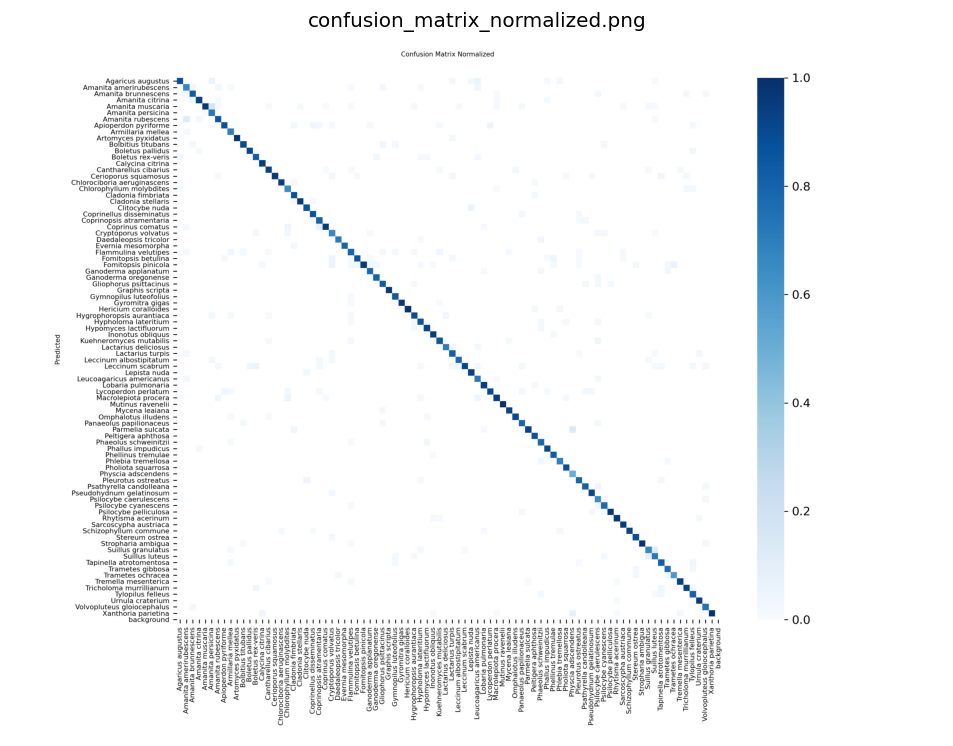

[HATA] Dosya bulunamadı: /kaggle/working/runs/classify/train2/F1_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/classify/train2/P_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/classify/train2/R_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/classify/train2/PR_curve.png


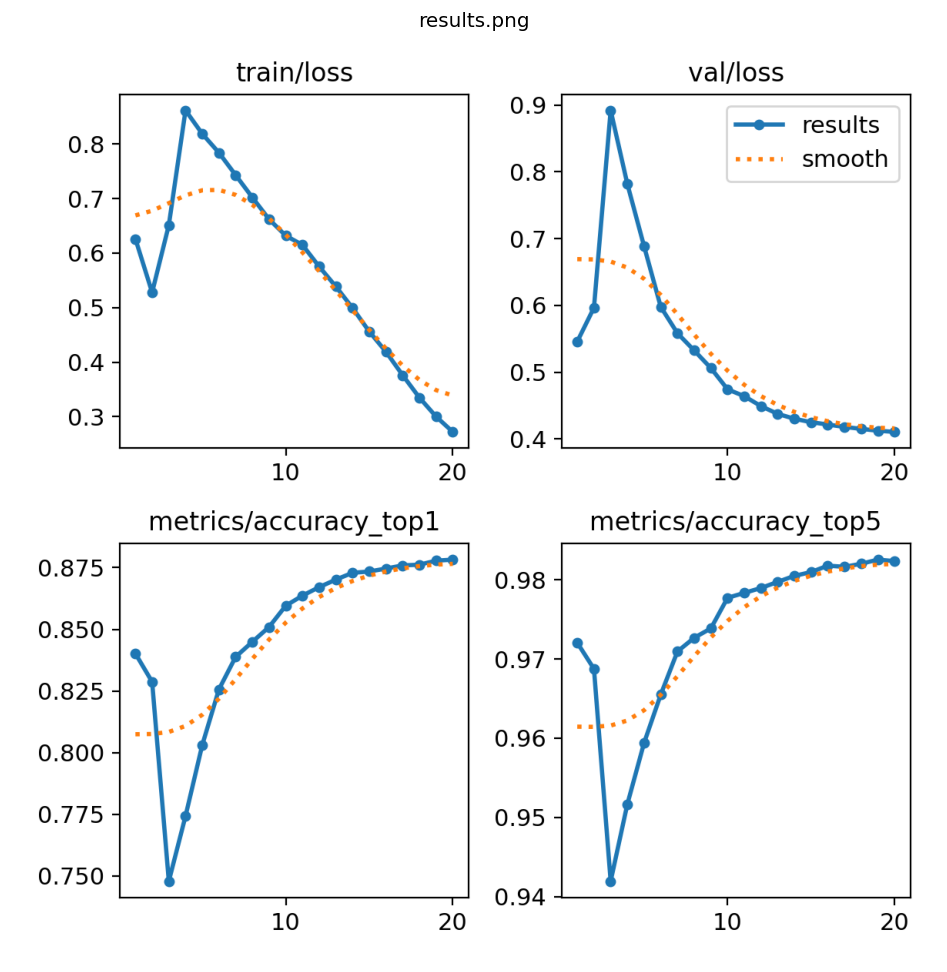

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        if not os.path.exists(image_path):
            print(f"[HATA] Dosya bulunamadı: {image_path}")
            continue

        img = cv2.imread(image_path)
        if img is None:
            print(f"[HATA] Görüntü okunamadı: {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/classify/train2'

# Display the images
display_images(post_training_files_path, image_files)

In [34]:
import torch
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
from lime import lime_image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import contextlib

In [35]:
# Preprocessing function
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return transform(image)

In [36]:
# Prediction function with output suppression
def batch_predict(images):
    device = next(model.parameters()).device
    input_tensors = [preprocess_image(Image.fromarray(img)) for img in images]
    batch = torch.stack(input_tensors).to(device)
    
    # Suppress all model output
    with open('/dev/null', 'w') as f, contextlib.redirect_stdout(f):
        with torch.no_grad():
            results = model(batch, verbose=False)
    
    # Extract probabilities
    all_probs = []
    for res in results:
        if res.probs is not None:
            all_probs.append(res.probs.data.cpu().numpy())
        else:
            all_probs.append(np.zeros(len(model.names)))
    
    return np.array(all_probs)

In [49]:
# Initialize explainer
explainer = lime_image.LimeImageExplainer()

# Load image
image_path = '/kaggle/input/mushroom1/merged_dataset/Bolbitius titubans/Bolbitius titubans_102.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

Starting LIME explanation...
Image: /kaggle/input/mushroom1/merged_dataset/Bolbitius titubans/Bolbitius titubans_102.jpg
Sample size: 500 | Batch size: 16


  0%|          | 0/500 [00:00<?, ?it/s]


Final Prediction:
- Bolbitius titubans: 99.99%
- Psilocybe cubensis: 0.01%
- Panaeolus papilionaceus: 0.00%
- Psilocybe azurescens: 0.00%
- Psilocybe cyanescens: 0.00%


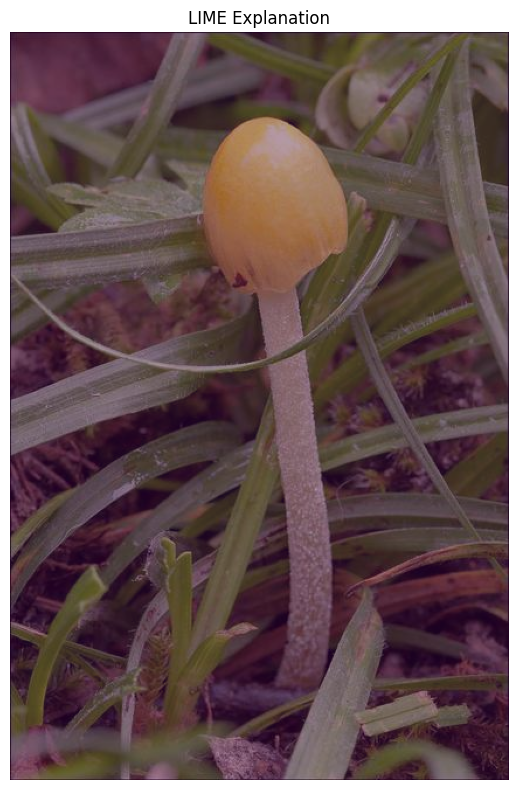


Explanation saved to 'lime_explanation.png'


In [50]:
# Print header
print("Starting LIME explanation...")
print(f"Image: {image_path}")
print(f"Sample size: 500 | Batch size: 16")

# Generate explanation
explanation = explainer.explain_instance(
    image=image,
    classifier_fn=batch_predict,
    top_labels=3,
    num_samples=500,
    batch_size=16,
    random_seed=42
)
# Get final prediction
orig_tensor = preprocess_image(Image.fromarray(image)).unsqueeze(0)
orig_tensor = orig_tensor.to(next(model.parameters()).device)
with torch.no_grad():
    result = model(orig_tensor, verbose=False)[0]

# Print final prediction
if result.probs is not None:
    probs = result.probs.data.cpu().numpy()
    top5_idx = np.argsort(probs)[-5:][::-1]
    class_names = list(model.names.values())
    
    print("\nFinal Prediction:")
    for idx in top5_idx:
        print(f"- {class_names[idx]}: {probs[idx]:.2%}")
else:
    print("\nNo probabilities found in results")

# Visualization
plt.figure(figsize=(10, 8))
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=8,
    hide_rest=False,
    min_weight=0.05
)

plt.imshow(temp)
plt.imshow(mask, cmap='viridis', alpha=0.4)
plt.axis('off')
plt.title('LIME Explanation')
plt.tight_layout()
plt.savefig('lime_explanation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nExplanation saved to 'lime_explanation.png'")